In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prak-apm4/Gaa.csv")

In [4]:
dataset.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,0,18,5,College,Operations,2,42363,9938
1,Software Engineer,1,21,5,College,Management,5,108476,11128
2,Warehouse Associate,0,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,1,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,1,26,5,Masters,Engineering,5,99464,9319


In [5]:
dataset.shape

(1000, 9)

In [14]:
#Deklarasi Variabel Dependent dan Independent
X = dataset[['Age', 'PerfEval', 'BasePay', 'Bonus']]
y = dataset['Seniority']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
#menggunakan SVM library untuk membuat SVM classifier
classifier = svm.SVC(kernel = 'linear')
 
#memasukkan training data kedalam classifier
classifier.fit(X_train, y_train)
 
#memasukkan testing data ke variabel y_predict
y_predict = classifier.predict(X_test)
 
#menampilkan classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.60      0.54      0.57        39
           2       0.38      0.25      0.30        48
           3       0.27      0.31      0.29        35
           4       0.27      0.31      0.29        32
           5       0.51      0.61      0.55        46

    accuracy                           0.41       200
   macro avg       0.40      0.40      0.40       200
weighted avg       0.41      0.41      0.41       200



Text(69.0, 0.5, 'Actual')

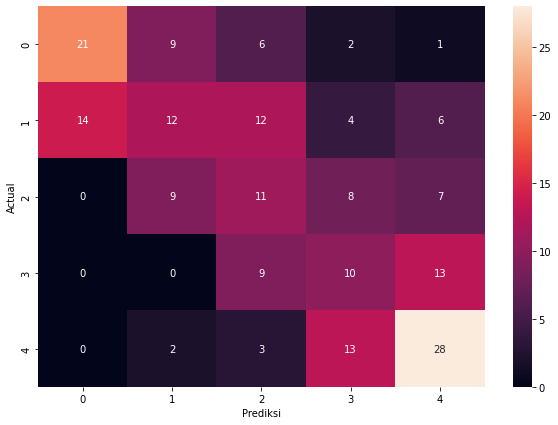

In [17]:
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm_svm = confusion_matrix(y_test, y_predict)
 
#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sn.heatmap(cm_svm, annot=True)
plt.xlabel('Prediksi')
plt.ylabel('Actual')